In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
data = pd.read_csv(r'TrainData.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-28,149.820007,153.169998,149.720001,152.570007,150.825089,100077900
1,2021-10-29,147.220001,149.940002,146.410004,149.800003,148.086746,124953200
2,2021-11-01,148.990005,149.699997,147.800003,148.960007,147.256378,74588300
3,2021-11-02,148.660004,151.570007,148.649994,150.020004,148.304260,69122000
4,2021-11-03,150.389999,151.970001,149.820007,151.490005,149.757416,54511500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
data["Close"] = pd.to_numeric(data.Close, errors = 'coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
sc = MinMaxScaler(feature_range = (0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(252, 1)

In [7]:
X_train = []
Y_train = []

for i in range (20, 252):
    X_train.append(trainData[i-20:i,0])
    Y_train.append(trainData[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(232, 20, 1)

In [9]:
model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [10]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose = 2)

Epoch 1/20
8/8 - 7s - loss: 0.1543 - 7s/epoch - 891ms/step
Epoch 2/20
8/8 - 0s - loss: 0.0580 - 231ms/epoch - 29ms/step
Epoch 3/20
8/8 - 0s - loss: 0.0442 - 230ms/epoch - 29ms/step
Epoch 4/20
8/8 - 0s - loss: 0.0419 - 230ms/epoch - 29ms/step
Epoch 5/20
8/8 - 0s - loss: 0.0423 - 275ms/epoch - 34ms/step
Epoch 6/20
8/8 - 0s - loss: 0.0338 - 226ms/epoch - 28ms/step
Epoch 7/20
8/8 - 0s - loss: 0.0350 - 228ms/epoch - 29ms/step
Epoch 8/20
8/8 - 0s - loss: 0.0311 - 231ms/epoch - 29ms/step
Epoch 9/20
8/8 - 0s - loss: 0.0361 - 232ms/epoch - 29ms/step
Epoch 10/20
8/8 - 0s - loss: 0.0290 - 231ms/epoch - 29ms/step
Epoch 11/20
8/8 - 0s - loss: 0.0273 - 237ms/epoch - 30ms/step
Epoch 12/20
8/8 - 0s - loss: 0.0260 - 274ms/epoch - 34ms/step
Epoch 13/20
8/8 - 0s - loss: 0.0250 - 247ms/epoch - 31ms/step
Epoch 14/20
8/8 - 0s - loss: 0.0264 - 243ms/epoch - 30ms/step
Epoch 15/20
8/8 - 0s - loss: 0.0260 - 232ms/epoch - 29ms/step
Epoch 16/20
8/8 - 0s - loss: 0.0212 - 230ms/epoch - 29ms/step
Epoch 17/20
8/8 - 0

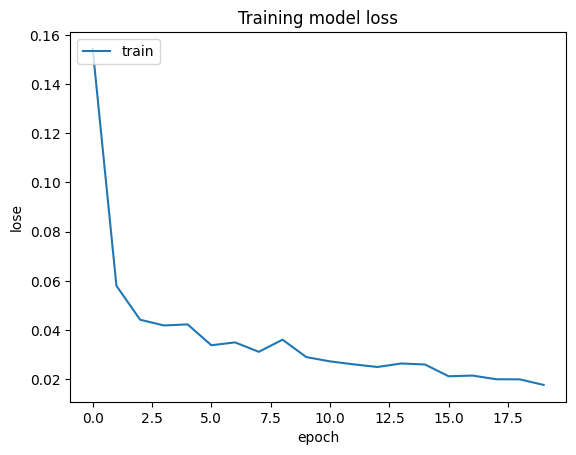

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('lose')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv(r'TestData.csv')
testData["Close"] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
Y_test = testData.iloc [60:,0:].values

inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 20
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape

(231, 20, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

8/8 [==============================] - 2s 11ms/step


array([[0.41268414],
       [0.4262533 ],
       [0.4277947 ],
       [0.41963673],
       [0.40485957],
       [0.38724664],
       [0.37112892],
       [0.35677883],
       [0.34296528],
       [0.32771462],
       [0.3165995 ],
       [0.3068013 ],
       [0.298392  ],
       [0.29304975],
       [0.28752387],
       [0.28021058],
       [0.26825964],
       [0.2497867 ],
       [0.22862193],
       [0.20586988],
       [0.18187994],
       [0.1576505 ],
       [0.13352238],
       [0.11362275],
       [0.09613775],
       [0.08050211],
       [0.06632753],
       [0.05247927],
       [0.04079068],
       [0.03387036],
       [0.03162549],
       [0.03594308],
       [0.04625814],
       [0.06096259],
       [0.07794531],
       [0.09792306],
       [0.11907315],
       [0.14102384],
       [0.1647228 ],
       [0.18798527],
       [0.21173775],
       [0.23525618],
       [0.2579609 ],
       [0.2812977 ],
       [0.30255404],
       [0.31929338],
       [0.33522323],
       [0.351

In [14]:
predicted_price = sc.inverse_transform(y_pred)

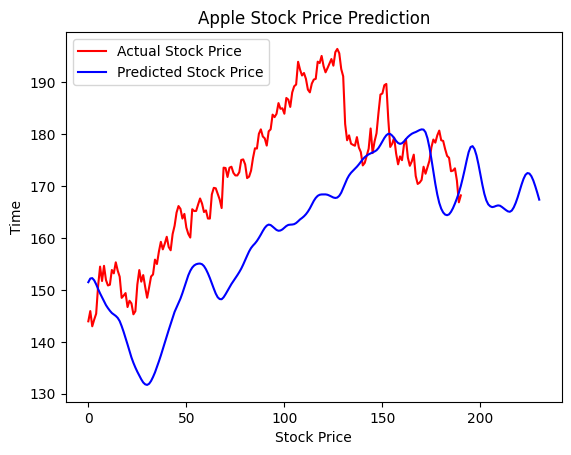

In [15]:
plt.plot(Y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Apple Stock Price Prediction')
plt.ylabel('Time')
plt.xlabel('Stock Price')
plt.legend()
plt.show()